# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [6]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    function1 = (x**2)*numpy.sin(x)
    return(function1);
print(f(numpy.pi/2))

2.4674011002723395


Ensure your function works with numpy arrays:

In [7]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [8]:
def g(x):
    '''Analytical integral of f(x).'''
    function2 = 2*x*numpy.sin(x) + (2-(x**2))*numpy.cos(x) - 2 
    return(function2);


Check your solution with the same numpy array:

In [9]:
assert g(0) == 0.

In [10]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [11]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    function3 = g(xmax) - g(xmin)
    return(function3);
print(integrate_analytic(1,2))


2.246239104913079


Check your analytic function:

In [12]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [13]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax-xmin)/N
    dx2 = (xmax - xmin)/(2*N)
    x = numpy.linspace(xmin,xmax,N+1)
    y = f(x)
    S = dx/6 * numpy.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S;
print(integrate_numeric(0, 4,50))

    

1.096594986172562


Make sure you have implemented Simpson's rule correctly:

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

AssertionError: 

In [15]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Error between Simpsons rule using N panels and analytic integration')

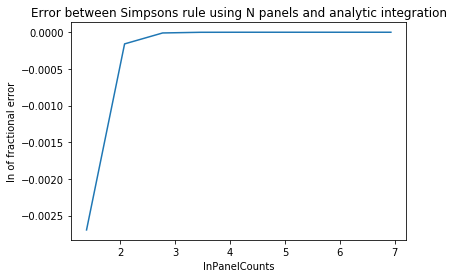

In [16]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
xvalues = [numpy.log(4),numpy.log(8),numpy.log(16),numpy.log(32),numpy.log(64),numpy.log(128),numpy.log(256),numpy.log(512),numpy.log(1024)]
yvalues = [numpy.log(integrate_numeric(x0, x1, 4)/result_analytic),numpy.log(integrate_numeric(x0, x1, 8)/result_analytic), numpy.log(integrate_numeric(x0, x1, 16)/result_analytic),numpy.log(integrate_numeric(x0, x1, 32)/result_analytic),numpy.log(integrate_numeric(x0, x1, 64)/result_analytic),numpy.log(integrate_numeric(x0, x1, 128)/result_analytic),numpy.log(integrate_numeric(x0, x1, 256)/result_analytic), numpy.log(integrate_numeric(x0, x1, 512)/result_analytic),numpy.log(integrate_numeric(x0, x1, 1024)/result_analytic)]
plt.plot(xvalues,yvalues)
plt.xlabel("lnPanelCounts")
plt.ylabel("ln of fractional error")
plt.title("Error between Simpsons rule using N panels and analytic integration")
                  

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method, the error scaling with N^-4, but a very large number of panels, over 10^5, will introduce a higher error value due to computer rounding errors.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

It would scale with N^-2, so there would be a larger error throughout. For a very large number of panels, over 10^6, due to previously mentioned rounding errors the error becomes similar.